# Lab Segmentation 1

In [9]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


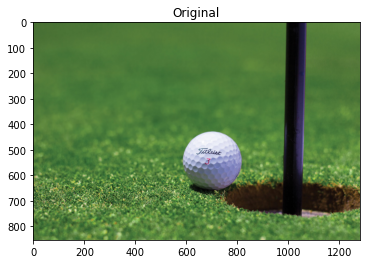

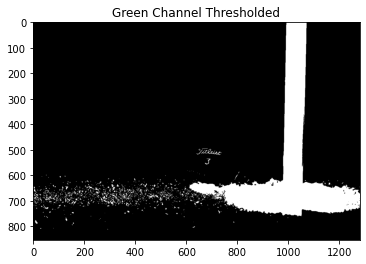

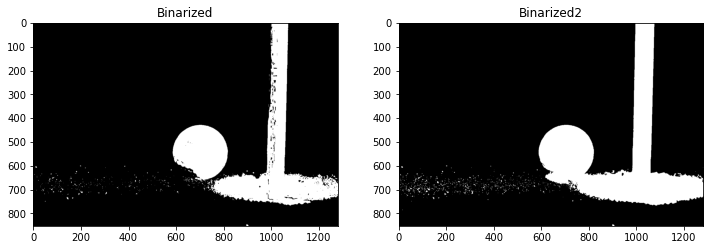

In [19]:
# 1- Read the image 
img= io.imread("./imgs/exp1/golf.jpeg")
floatImg=img.astype(float)
# [VERY IMPORTANT] and convert it to float: image = image.astype(float)
show_images([img],['Original'])
# read image golf

# 2- Retreive the 3 channels of the image(R,G,B) (will be used in the coming steps)
r=img[:,:,0]
g=img[:,:,1]
b=img[:,:,2]
# 3- Visually (not by code) detect the dominating color channel (C) for the backgroung (R, G or B)

#Green

# 4- Draw the dominating channel (r, g or b) thresholded by some threshold (to make sure your choice is meaningful)
show_images([255-RGB2binary(g,90)],['Green Channel Thresholded'])

# 5- Get an intuitive way(There is a very simple way) to make a mask that can get the pixels where the values of the dominating channels 
# have larger values than the other channels with an appropriate threshold
threshold=0.59
binarized=np.ones((img.shape[0],img.shape[1]),dtype=float)
#binarized[floatImg[:,:,0]>threshold*np.add(floatImg[:,:,1],floatImg[:,:,2])]=0
binarized[floatImg[:,:,1]>threshold*np.add(floatImg[:,:,0],floatImg[:,:,2])]=0
#binarized[floatImg[:,:,2]>threshold*np.add(floatImg[:,:,1],floatImg[:,:,0])]=0

threshold=30
binarized2=np.ones((img.shape[0],img.shape[1]),dtype=float)
#binarized2[(floatImg[:,:,0]-0.5*np.add(floatImg[:,:,1],floatImg[:,:,2]))>threshold]=0
binarized2[(floatImg[:,:,1]-0.5*np.add(floatImg[:,:,0],floatImg[:,:,2]))>threshold]=0
#binarized2[(floatImg[:,:,2]-0.5*np.add(floatImg[:,:,1],floatImg[:,:,0]))>threshold]=0

# 6- display the binarized image

show_images([binarized,binarized2],['Binarized','Binarized2'])




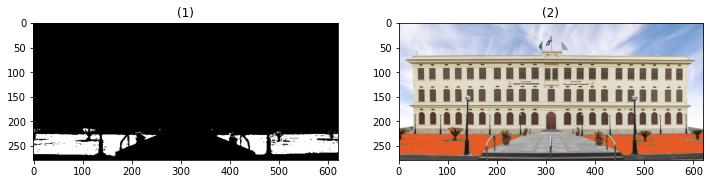

In [20]:
# 1- Get the required RGB color (Using a color picker)

#from (0,50,0) to (50,255,0) so its (25,150,0)

# 2- Read image

img_original= io.imread("./imgs/exp2/cufe.png")
img=img_original.astype(float)

# 3- extract R, G and B channels (as float)
r_org=img[:,:,0]
g_org=img[:,:,1]
b_org=img[:,:,2]
# 4- calculate differences FOR EACH CHANNEL (between the image and the required pixel value)
r=r_org-25
r=np.float_power(r,2)
g=g_org-150
g=np.float_power(g,2)
b=np.float_power(b_org,2)
# 5- calculate overall distance from the given RGB color (use any appropriate distance measure, take care of the minus distances)
distance=np.sqrt(np.add(np.add(r,g),b))
# 6-  create a mask by thresholding the differences
distance[distance<=100]=1
distance[distance>100]=0
neg_distance=1-distance
# 7- In the input image, Replace the pixels of the mask with the following color
# R = 230 , G = 90 , B=40
r=np.multiply(r_org,neg_distance)
r[r==0]=230
g=np.multiply(g_org,neg_distance)
g[g==0]=90
b=np.multiply(b_org,neg_distance)
b[b==0]=40
img[:,:,0]=r
img[:,:,1]=g
img[:,:,2]=b
img=img.astype(int)
# 8- show the image or save it
show_images([distance,img])